In [1]:
from colorscheme import colors

In [2]:
import os
os.chdir(os.path.join('..', '..', '..'))
print(os.getcwd())

/Users/eharkin/Documents/projects/5HTGIF


In [3]:
import pickle

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset
import seaborn as sns
from ezephys import pltools

from grr.ThresholdModel import constructMedianModel
from grr.Tools import dashedBorder

In [4]:
plt.style.use(os.path.join('figs', 'scripts', 'writeup', 'publication_figure_style.dms'))
IMG_PATH = os.path.join('figs', 'ims', 'writeup', 'GIF_filters')

In [5]:
MODEL_PATH = os.path.join('data', 'models')

In [6]:
models = {}
for celltype in ['GABA', '5HT', 'mPFC']:
    models[celltype] = {}
    for modtype in ['GIFs', 'AugmentedGIFs']:
        with open(os.path.join(MODEL_PATH, celltype, '_'.join([celltype, modtype]) + '.lmod'), 'rb') as f:
            models[celltype][modtype] = pickle.load(f)

# Publication figures

In [7]:
xlims = (0.8, 700)

## 5HT

In [8]:
medmod = constructMedianModel(type(models['5HT']['GIFs'][0]), models['5HT']['GIFs'])

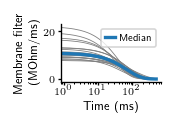

In [9]:
plt.figure(figsize=(1.5, 1))

plt.subplot(111)
for mod in models['5HT']['GIFs']:
    t, filt = mod.getInterpolatedMembraneFilter(500, 0.5)
    plt.semilogx(t, filt, '-', color='gray')
    
t, filt = medmod.getInterpolatedMembraneFilter(500, 0.5)
plt.semilogx(t, filt, '-', color=colors['ser'], lw=2, label='Median')

plt.xlim(xlims)
plt.xlabel('Time (ms)')
plt.ylabel('Membrane filter\n(MOhm/ms)')
plt.legend()

plt.tight_layout()
pltools.hide_border('tr')

if IMG_PATH is not None:
    plt.savefig(os.path.join(IMG_PATH, '5HT_membrane_filt.png'))
    plt.savefig(os.path.join(IMG_PATH, '5HT_membrane_filt.svg'))

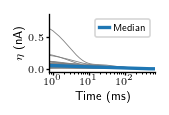

In [10]:
plt.figure(figsize=(1.5, 1))

plt.subplot(111)
for mod in models['5HT']['GIFs']:
    t, filt = mod.eta.getInterpolatedFilter(0.5)
    plt.semilogx(t, filt, '-', color='gray')
    
t, filt = medmod.eta.getInterpolatedFilter(0.5)
plt.semilogx(t, filt, '-', color=colors['ser'], lw=2, label='Median')

plt.xlim(xlims)
plt.xlabel('Time (ms)')
plt.ylabel('$\eta$ (nA)')
plt.legend()

plt.tight_layout()
pltools.hide_border('tr')

if IMG_PATH is not None:
    plt.savefig(os.path.join(IMG_PATH, '5HT_eta_filt.png'))
    plt.savefig(os.path.join(IMG_PATH, '5HT_eta_filt.svg'))

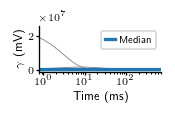

In [11]:
plt.figure(figsize=(1.5, 1))

plt.subplot(111)
for mod in models['5HT']['GIFs']:
    t, filt = mod.gamma.getInterpolatedFilter(0.5)
    plt.semilogx(t, filt, '-', color='gray')
    
t, filt = medmod.gamma.getInterpolatedFilter(0.5)
plt.semilogx(t, filt, '-', color=colors['ser'], lw=2, label='Median')

plt.xlim(xlims)
plt.xlabel('Time (ms)')
plt.ylabel('$\gamma$ (mV)')
plt.legend()

plt.tight_layout()
pltools.hide_border('tr')

if IMG_PATH is not None:
    plt.savefig(os.path.join(IMG_PATH, '5HT_gamma_filt.png'))
    plt.savefig(os.path.join(IMG_PATH, '5HT_gamma_filt.svg'))


# SOM

In [12]:
medmod = constructMedianModel(type(models['GABA']['GIFs'][0]), models['GABA']['GIFs'])

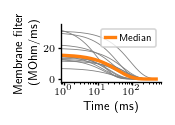

In [13]:
plt.figure(figsize=(1.5, 1))

plt.subplot(111)
for mod in models['GABA']['GIFs']:
    t, filt = mod.getInterpolatedMembraneFilter(500, 0.5)
    plt.semilogx(t, filt, '-', color='gray')
    
t, filt = medmod.getInterpolatedMembraneFilter(500, 0.5)
plt.semilogx(t, filt, '-', color=colors['som'], lw=2, label='Median')
    
plt.xlim(xlims)
plt.xlabel('Time (ms)')
plt.ylabel('Membrane filter\n(MOhm/ms)')
plt.legend()

plt.tight_layout()
pltools.hide_border('tr')

if IMG_PATH is not None:
    plt.savefig(os.path.join(IMG_PATH, 'GABA_membrane_filt.png'))
    plt.savefig(os.path.join(IMG_PATH, 'GABA_membrane_filt.svg'))

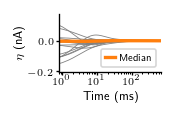

In [14]:
plt.figure(figsize=(1.5, 1))

plt.subplot(111)
for mod in models['GABA']['GIFs']:
    t, filt = mod.eta.getInterpolatedFilter(0.5)
    plt.semilogx(t, filt, '-', color='gray')
    
t, filt = medmod.eta.getInterpolatedFilter(0.5)
plt.semilogx(t, filt, '-', color=colors['som'], lw=2, label='Median')
    
plt.xlim(xlims)
plt.xlabel('Time (ms)')
plt.ylabel('$\eta$ (nA)')
plt.legend()

plt.tight_layout()
pltools.hide_border('tr')

if IMG_PATH is not None:
    plt.savefig(os.path.join(IMG_PATH, 'GABA_eta_filt.png'))
    plt.savefig(os.path.join(IMG_PATH, 'GABA_eta_filt.svg'))

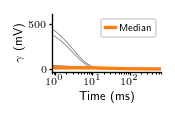

In [15]:
plt.figure(figsize=(1.5, 1))

plt.subplot(111)
for mod in models['GABA']['GIFs']:
    t, filt = mod.gamma.getInterpolatedFilter(0.5)
    plt.semilogx(t, filt, '-', color='gray')
    
t, filt = medmod.gamma.getInterpolatedFilter(0.5)
plt.semilogx(t, filt, '-', color=colors['som'], lw=2, label='Median')
    
plt.xlim(xlims)
plt.xlabel('Time (ms)')
plt.ylabel('$\gamma$ (mV)')
plt.legend()

plt.tight_layout()
pltools.hide_border('tr')

if IMG_PATH is not None:
    plt.savefig(os.path.join(IMG_PATH, 'GABA_gamma_filt.png'))
    plt.savefig(os.path.join(IMG_PATH, 'GABA_gamma_filt.svg'))


# mPFC

In [16]:
medmod = constructMedianModel(type(models['mPFC']['GIFs'][0]), models['mPFC']['GIFs'])

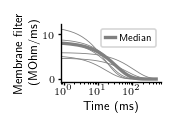

In [17]:

plt.figure(figsize=(1.5, 1))

plt.subplot(111)
for mod in models['mPFC']['GIFs']:
    t, filt = mod.getInterpolatedMembraneFilter(500, 0.5)
    plt.semilogx(t, filt, '-', color='gray')
    
t, filt = medmod.getInterpolatedMembraneFilter(500, 0.5)
plt.semilogx(t, filt, '-', color=colors['pyr'], lw=2, label='Median')
    
plt.xlim(xlims)
plt.xlabel('Time (ms)')
plt.ylabel('Membrane filter\n(MOhm/ms)')
plt.legend()

plt.tight_layout()
pltools.hide_border('tr')

if IMG_PATH is not None:
    plt.savefig(os.path.join(IMG_PATH, 'mPFC_membrane_filt.png'))
    plt.savefig(os.path.join(IMG_PATH, 'mPFC_membrane_filt.svg'))

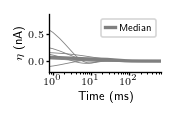

In [18]:
plt.figure(figsize=(1.5, 1))

plt.subplot(111)
for mod in models['mPFC']['GIFs']:
    t, filt = mod.eta.getInterpolatedFilter(0.5)
    plt.semilogx(t, filt, '-', color='gray')
    
t, filt = medmod.eta.getInterpolatedFilter(0.5)
plt.semilogx(t, filt, '-', color=colors['pyr'], lw=2, label='Median')
    
plt.xlim(xlims)
plt.xlabel('Time (ms)')
plt.ylabel('$\eta$ (nA)')
plt.legend()

plt.tight_layout()
pltools.hide_border('tr')

if IMG_PATH is not None:
    plt.savefig(os.path.join(IMG_PATH, 'mPFC_eta_filt.png'))
    plt.savefig(os.path.join(IMG_PATH, 'mPFC_eta_filt.svg'))

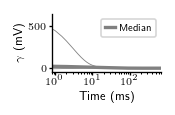

In [19]:
plt.figure(figsize=(1.5, 1))

plt.subplot(111)
for mod in models['mPFC']['GIFs']:
    t, filt = mod.gamma.getInterpolatedFilter(0.5)
    plt.semilogx(t, filt, '-', color='gray')
    
t, filt = medmod.gamma.getInterpolatedFilter(0.5)
plt.semilogx(t, filt, '-', color=colors['pyr'], lw=2, label='Median')
    
plt.xlim(xlims)
plt.xlabel('Time (ms)')
plt.ylabel('$\gamma$ (mV)')
plt.legend()

plt.tight_layout()
pltools.hide_border('tr')

if IMG_PATH is not None:
    plt.savefig(os.path.join(IMG_PATH, 'mPFC_gamma_filt.png'))
    plt.savefig(os.path.join(IMG_PATH, 'mPFC_gamma_filt.svg'))

# Compare median filters across cell types

In [20]:
median_models = {
    '5HT': constructMedianModel(type(models['5HT']['GIFs'][0]), models['5HT']['GIFs']),
    'GABA': constructMedianModel(type(models['GABA']['GIFs'][0]), models['GABA']['GIFs']),
    'mPFC': constructMedianModel(type(models['mPFC']['GIFs'][0]), models['mPFC']['GIFs'])
}

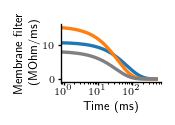

In [21]:
plt.figure(figsize=(1.5, 1))

plt.subplot(111)
for mod_name, color_name in zip(['5HT', 'GABA', 'mPFC'], ['ser', 'som', 'pyr']):
    t, filt = median_models[mod_name].getInterpolatedMembraneFilter(500, 0.5)
    plt.semilogx(t, filt, lw=2, color=colors[color_name], label=mod_name)
    
plt.xlim(xlims)
plt.xlabel('Time (ms)')
plt.ylabel('Membrane filter\n(MOhm/ms)')

plt.tight_layout()
pltools.hide_border('tr')

if IMG_PATH is not None:
    plt.savefig(os.path.join(IMG_PATH, 'membrane_filter_celltype_comparison.png'))
    plt.savefig(os.path.join(IMG_PATH, 'membrane_filter_celltype_comparison.svg'))

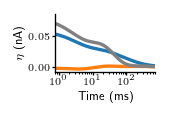

In [22]:
plt.figure(figsize=(1.5, 1))

plt.subplot(111)
for mod_name, color_name in zip(['5HT', 'GABA', 'mPFC'], ['ser', 'som', 'pyr']):
    t, filt = median_models[mod_name].eta.getInterpolatedFilter(0.5)
    plt.semilogx(t, filt, lw=2, color=colors[color_name], label=mod_name)
    
plt.xlim(xlims)
plt.xlabel('Time (ms)')
plt.ylabel('$\eta$ (nA)')

plt.tight_layout()
pltools.hide_border('tr')

if IMG_PATH is not None:
    plt.savefig(os.path.join(IMG_PATH, 'eta_filter_celltype_comparison.png'))
    plt.savefig(os.path.join(IMG_PATH, 'eta_filter_celltype_comparison.svg'))

/miniconda3/envs/neopozz/lib/python2.7/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


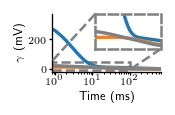

In [23]:
plt.figure(figsize=(1.5, 1))

gamma_ax = plt.subplot(111)
gamma_inset = inset_axes(gamma_ax, '60%', '60%', loc='upper right', borderpad=0.05)
for mod_name, color_name in zip(['5HT', 'GABA', 'mPFC'], ['ser', 'som', 'pyr']):
    t, filt = median_models[mod_name].gamma.getInterpolatedFilter(0.5)
    gamma_ax.semilogx(t, filt, lw=2, color=colors[color_name], label=mod_name)
    gamma_inset.semilogx(t, filt, lw=2, color=colors[color_name], label=mod_name)
  
gamma_ax.set_xlim(xlims)
gamma_ax.set_xlabel('Time (ms)')
gamma_ax.set_ylabel('$\gamma$ (mV)')

gamma_inset.set_xlim(0.8, 100)
gamma_inset.set_ylim(-5, 50)
mark_inset(gamma_ax, gamma_inset, 2, 4, ls='--', color='gray', lw=1.5)
dashedBorder(gamma_inset, lw=1.5)
pltools.hide_ticks(ax=gamma_inset)

plt.tight_layout()
pltools.hide_border('tr', ax=gamma_ax)

if IMG_PATH is not None:
    plt.savefig(os.path.join(IMG_PATH, 'gamma_filter_celltype_comparison.png'))
    plt.savefig(os.path.join(IMG_PATH, 'gamma_filter_celltype_comparison.svg'))